In [ ]:
cd drive/MyDrive/DSP_Project/

[Errno 2] No such file or directory: 'drive/MyDrive/DSP_Project/'
/content/drive/MyDrive/DSP_Project


In [ ]:
!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
filename='UrbanSound8K/dog_bark.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!dir

Evaluation\ audio  Proposal	 UrbanSound8K
Notebooks	   saved_models  UrbanSound\ Dataset\ sample


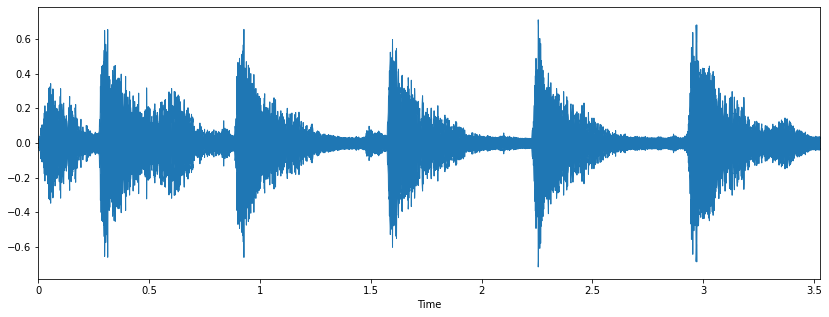

In [ ]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
data

array([0.01388212, 0.02055149, 0.01845404, ..., 0.01507499, 0.01250785,
       0.01730848], dtype=float32)

In [ ]:
import pandas as pd

metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
air_conditioner     1000
drilling            1000
engine_idling       1000
jackhammer          1000
children_playing    1000
street_music        1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='UrbanSound8K/4201-3-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[ 0.          0.          0.         ... -0.07455782 -0.07427226
  0.        ]


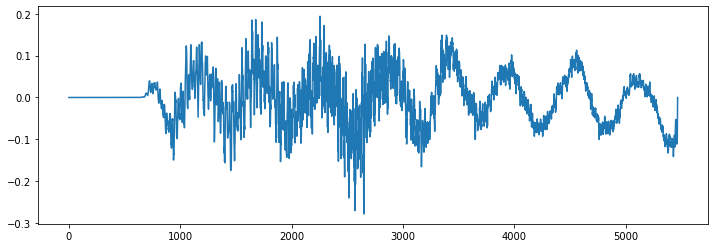

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)


# **Observation**
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [ ]:
from scipy.io import wavfile as wav

In [ ]:
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [ ]:
wave_audio

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-2357, -2032],
       [-2327, -2161],
       [-2596, -2295]], dtype=int16)

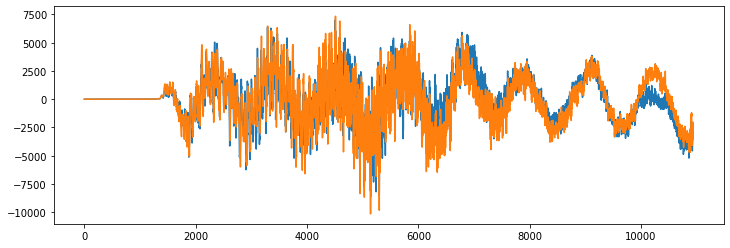

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

# **Extract Features**
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 11)


In [ ]:
mfccs

array([[-5.27520935e+02, -2.93282715e+02, -1.90003784e+02,
        -1.52674576e+02, -1.39339722e+02, -1.42487640e+02,
        -1.60361038e+02, -1.89350449e+02, -2.17289413e+02,
        -2.33016800e+02, -2.27845825e+02],
       [ 1.31533112e+02,  1.35372223e+02,  1.25179581e+02,
         1.03865891e+02,  8.84239883e+01,  9.06229477e+01,
         9.16858063e+01,  8.85056534e+01,  8.18104935e+01,
         8.21154251e+01,  8.09827423e+01],
       [ 1.98278122e+01,  1.10411358e+01, -1.48624408e+00,
        -1.43112316e+01, -1.40572071e+01, -7.05646813e-01,
         2.02099919e+00,  4.87855196e+00,  2.10169244e+00,
         8.11671257e+00,  4.75461578e+00],
       [-1.69313502e+00, -5.06422901e+00, -2.36067176e+00,
         5.87041378e+00,  1.15253992e+01,  1.14624043e+01,
         1.19005833e+01,  1.36548061e+01,  1.77582073e+01,
         1.60753136e+01,  6.77493668e+00],
       [-8.36894417e+00, -1.89570522e+01, -2.23668709e+01,
        -3.20293503e+01, -4.68006134e+01, -5.48897552e+01,
  

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [18:43,  3.22it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [43:14,  4.22it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [43:15,  4.42it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [45:19,  3.21it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
y=np.array(pd.get_dummies(y))

In [ ]:
y.shape

(8732, 10)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936139e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699329e+02,  9.2890648e+01,  3.0233369e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530842e+00, -8.9652115e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321606e+00]], dtype=float32)

In [ ]:
y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
X_test.shape

(1747, 40)

In [ ]:
y_train.shape

(6985, 10)

In [ ]:
y_test.shape

(1747, 10)


# **Model Creation**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
206/219 [===========================>..] - ETA: 0s - loss: 13.4101 - accuracy: 0.1239
Epoch 00001: val_loss improved from inf to 2.28541, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 6ms/step - loss: 12.8434 - accuracy: 0.1231 - val_loss: 2.2854 - val_accuracy: 0.1105
Epoch 2/100
203/219 [==========================>...] - ETA: 0s - loss: 2.7191 - accuracy: 0.1168
Epoch 00002: val_loss improved from 2.28541 to 2.28137, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.7056 - accuracy: 0.1161 - val_loss: 2.2814 - val_accuracy: 0.1116
Epoch 3/100
210/219 [===========================>..] - ETA: 0s - loss: 2.3494 - accuracy: 0.1202
Epoch 00003: val_loss improved from 2.28137 to 2.25765, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3464 - accuracy: 0.1211 - val_loss: 2.2577 - val_ac

In [49]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7481396794319153


In [50]:
filename="UrbanSound8K/dog_bark.wav"
prediction_feature=features_extractor(filename)
prediction_feature=prediction_feature.reshape(1,-1)


predict_x=model.predict(prediction_feature) 
classes_x=np.argmax(predict_x,axis=1)

Text3
# **New Section**

In [51]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [52]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features
    

In [53]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [05:25, 10.81it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8324it [12:34, 15.15it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [12:34, 22.63it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [13:09, 11.06it/s]


In [54]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.09133, ...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01074, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265705,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.60859, 1.6...",children_playing


In [55]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [56]:
X.shape

(8732, 40)

In [57]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [58]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

In [59]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [60]:
X_train

array([[-1.3183614e+02,  1.1397464e+02, -2.3956861e+01, ...,
         3.3314774e+00, -1.4786111e+00,  2.8736601e+00],
       [-1.4074220e+01,  9.1916939e+01, -8.6787205e+00, ...,
        -3.3844025e+00, -5.2119040e+00, -1.5936139e+00],
       [-4.9532028e+01,  1.5521857e-01, -2.0369110e+01, ...,
         2.0491767e+00, -8.0537486e-01,  2.7793026e+00],
       ...,
       [-4.2699329e+02,  9.2890648e+01,  3.0233369e+00, ...,
         8.6335993e-01,  6.4766800e-01,  7.8490508e-01],
       [-1.4607024e+02,  1.3709459e+02, -3.4298344e+01, ...,
         1.3777871e+00, -1.9530842e+00, -8.9652115e-01],
       [-4.2167450e+02,  2.1169032e+02,  2.6820304e+00, ...,
        -5.1484952e+00, -3.6400859e+00, -1.3321606e+00]], dtype=float32)

In [61]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [62]:
import tensorflow as tf
print(tf.__version__)

2.7.0


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [64]:
### No of classes
num_labels=y.shape[1]

In [65]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 100)               4100      
                                                                 
 activation_4 (Activation)   (None, 100)               0         
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_5 (Dense)             (None, 200)               20200     
                                                                 
 activation_5 (Activation)   (None, 200)               0         
                                                                 
 dropout_4 (Dropout)         (None, 200)               0         
                                                                 
 dense_6 (Dense)             (None, 100)              

In [70]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [68]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/500
216/219 [============================>.] - ETA: 0s - loss: 10.6681 - accuracy: 0.1259
Epoch 00001: val_loss improved from inf to 2.27454, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 4ms/step - loss: 10.5877 - accuracy: 0.1264 - val_loss: 2.2745 - val_accuracy: 0.1385
Epoch 2/500
205/219 [===========================>..] - ETA: 0s - loss: 2.5843 - accuracy: 0.1276
Epoch 00002: val_loss did not improve from 2.27454
219/219 [==============================] - 1s 3ms/step - loss: 2.5784 - accuracy: 0.1283 - val_loss: 2.2776 - val_accuracy: 0.1305
Epoch 3/500
217/219 [============================>.] - ETA: 0s - loss: 2.3319 - accuracy: 0.1322
Epoch 00003: val_loss improved from 2.27454 to 2.26149, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 1s 3ms/step - loss: 2.3326 - accuracy: 0.1319 - val_loss: 2.2615 - val_accuracy: 0.1322
Epoch 4/500
218/219 [========================

In [75]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

#num_epochs = 12
#num_batch_size = 128

num_epochs = 200
num_batch_size = 256

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
24/28 [========================>.....] - ETA: 0s - loss: 0.7158 - accuracy: 0.7650
Epoch 00001: val_loss improved from inf to 0.65292, saving model to saved_models/weights.best.basic_cnn.hdf5
28/28 [==============================] - 0s 17ms/step - loss: 0.7092 - accuracy: 0.7666 - val_loss: 0.6529 - val_accuracy: 0.8014
Epoch 2/200
28/28 [==============================] - ETA: 0s - loss: 0.6958 - accuracy: 0.7699
Epoch 00002: val_loss improved from 0.65292 to 0.65052, saving model to saved_models/weights.best.basic_cnn.hdf5
28/28 [==============================] - 0s 9ms/step - loss: 0.6958 - accuracy: 0.7699 - val_loss: 0.6505 - val_accuracy: 0.8025
Epoch 3/200
27/28 [===========================>..] - ETA: 0s - loss: 0.7099 - accuracy: 0.7653
Epoch 00003: val_loss improved from 0.65052 to 0.64645, saving model to saved_models/weights.best.basic_cnn.hdf5
28/28 [==============================] - 0s 9ms/step - loss: 0.7126 - accuracy: 0.7649 - val_loss: 0.6465 - val_accuracy:

# **Accuracy Using CNN**

In [77]:
# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.8813170790672302
Testing Accuracy:  0.8070979118347168


# **Testing Models**

In [83]:
filename="UrbanSound8K/dog_bark.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features) 
classes_x=np.argmax(predicted_label,axis=1)
# predicted_label=model.predict_classes(mfccs_scaled_features)
print(classes_x)
prediction_class = labelencoder.inverse_transform(classes_x) 
prediction_class

[-2.1540604e+02  6.3675201e+01 -9.5808517e+01 -1.3642116e+01
 -7.0410072e+01  6.0429759e+00 -2.3818895e+01  1.2698283e+01
  1.4457608e+00  1.6630854e+01  3.0466628e+00  1.2379841e+01
  8.8247795e+00 -2.1071818e+00 -3.7651238e+00 -5.4061790e-03
  5.0018702e+00  9.1733675e+00  5.1897254e+00  1.2017233e+01
  7.9679027e+00  1.0825561e+01  4.9411613e-01  6.3809476e+00
  3.2629001e+00  3.6214769e+00  1.5977993e+00  4.4266601e+00
  6.2376599e+00  6.1911292e+00  6.1724992e+00  5.9018164e+00
  4.6225328e+00  5.5130291e+00  3.5410290e+00  5.3258519e+00
  4.2299705e+00  6.3558269e+00  4.7071776e+00  6.0877781e+00]
[[-2.1540604e+02  6.3675201e+01 -9.5808517e+01 -1.3642116e+01
  -7.0410072e+01  6.0429759e+00 -2.3818895e+01  1.2698283e+01
   1.4457608e+00  1.6630854e+01  3.0466628e+00  1.2379841e+01
   8.8247795e+00 -2.1071818e+00 -3.7651238e+00 -5.4061790e-03
   5.0018702e+00  9.1733675e+00  5.1897254e+00  1.2017233e+01
   7.9679027e+00  1.0825561e+01  4.9411613e-01  6.3809476e+00
   3.2629001e+00 

array(['dog_bark'], dtype='<U16')

In [87]:
filename='UrbanSound8K/audio/fold10/2937-1-0-0.wav'
ipd.Audio(filename)


In [91]:
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features) 
classes_x=np.argmax(predicted_label,axis=1)
# predicted_label=model.predict_classes(mfccs_scaled_features)
print(classes_x)
prediction_class = labelencoder.inverse_transform(classes_x) 
prediction_class

[1]


array(['car_horn'], dtype='<U16')

In [98]:
filename = 'UrbanSound8K/audio/fold10/11722-3-0-0.wav'
ipd.Audio(filename)


In [99]:
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

# print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
# print(mfccs_scaled_features)
# print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features) 
classes_x=np.argmax(predicted_label,axis=1)
# predicted_label=model.predict_classes(mfccs_scaled_features)
print(classes_x)
prediction_class = labelencoder.inverse_transform(classes_x) 
prediction_class

[3]


array(['dog_bark'], dtype='<U16')